# Chat Models & Chat Prompt Templates

In [149]:
!pip install -q langchain

In [150]:
!pip install -Uq langchain langchain-openai

In [3]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

In [4]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")

In [6]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English to Simplified Chinese."),
    HumanMessage("Hi!")
]

model.invoke(messages)

AIMessage(content='你好！', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 23, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-7a193010-e16f-4e9f-8426-21717e62590a-0', usage_metadata={'input_tokens': 23, 'output_tokens': 3, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
model.invoke('How long would it take to grow a tomato from one of its seed?')

AIMessage(content="Growing a tomato from seed to harvest typically takes about 70 to 100 days, depending on the variety of tomato and the growing conditions. Here's a general timeline:\n\n1. **Seed Germination**: Tomato seeds usually take about 5 to 14 days to germinate after planting in ideal conditions (warm soil, moisture).\n\n2. **Seedling Stage**: Once germinated, the seedlings will grow for about 4 to 6 weeks (30 to 42 days) before they are ready to be transplanted outdoors or into larger pots.\n\n3. **Transplanting**: If you transplant seedlings after the last frost, they will need additional time to establish themselves in their new environment.\n\n4. **Fruit Development**: After transplanting, it generally takes another 50 to 80 days for the plants to mature and produce ripe fruit, depending on the variety.\n\nOverall, from planting the seed to harvesting ripe tomatoes, you can expect the process to take about 3 to 4 months. Factors such as temperature, sunlight, watering, and

In [10]:
for token in model.stream(messages):
    print(token.content, end='--')

--你好--！----

In [12]:
model.invoke([
    {'role': 'system', 'content': "convert the sentence into a child's tone in English"},
    {'role': 'user', 'content': 'Will you marry me?'}
])

AIMessage(content='Will you be my forever friend?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 25, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-4294a36c-3a3f-4a17-a88e-5706a35d2802-0', usage_metadata={'input_tokens': 25, 'output_tokens': 8, 'total_tokens': 33, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
from langchain_core.prompts import ChatPromptTemplate

system_template =  "Translate the following from English to {language}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)

In [14]:
prompt = prompt_template.invoke({"language": "Italian", "text": "Hello!"})
prompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following from English to Italian', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={})])

In [15]:
prompt.to_messages()

[SystemMessage(content='Translate the following from English to Italian', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={})]

In [16]:
response = model.invoke(prompt)

In [17]:
response

AIMessage(content='Ciao!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 4, 'prompt_tokens': 20, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-5ec04c3c-3e5f-4614-8986-316430752eb7-0', usage_metadata={'input_tokens': 20, 'output_tokens': 4, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [22]:
response.content

'Ciao!'

# Search over PDF

In [23]:
!pip install -q langchain-community pypdf

In [24]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are greate human friends, known for their loyalies and cuteness.",
        metadata={'source': "my creativity"},
    ),
    Document(
        page_content="Cats are evil animals that steal human hearts.",
        metadata={'source': 'my brain'}
    )
]

In [25]:
from langchain_community.document_loaders import PyPDFLoader

file_path = '/home/thekhoi/Downloads/TheKhoi_AIEngineer_Application/TheKhoi_CoverLetter_AIEngineer.pdf'

loader = PyPDFLoader(file_path)

docs = loader.load()

len(docs)

1

In [26]:
docs[0]

Document(metadata={'source': '/home/thekhoi/Downloads/TheKhoi_AIEngineer_Application/TheKhoi_CoverLetter_AIEngineer.pdf', 'page': 0}, page_content='COVER LETTER\nDear Hiring Manager at TrustingSocial,\nI am writing to express my keen interest in the Machine Learning Engineer  position at TrustingSocial, \nas advertised on LinkedIn. With a Bachelor Degree in AI and a year of experience as an AI Engineer, \nhands-on with projects that go deep into recommendation systems, computer vision, and generative AI, I \nbelieve that the skills I bring are a good fit for the team.\nDuring my tenure as an AI Engineer, I actively participated in various projects, one of them was \nRecommendation Systems. Those projects provided me with valuable challenges and opportunities to \nbuild and train models that give meaningful suggestions to users to keep them engaged in our products. In \na side projects where I learn things as a hobby, I applied Machine Learning knowledges collected from \ncollege into a

In [27]:
type(docs)

list

In [28]:
docs[0].page_content

'COVER LETTER\nDear Hiring Manager at TrustingSocial,\nI am writing to express my keen interest in the Machine Learning Engineer  position at TrustingSocial, \nas advertised on LinkedIn. With a Bachelor Degree in AI and a year of experience as an AI Engineer, \nhands-on with projects that go deep into recommendation systems, computer vision, and generative AI, I \nbelieve that the skills I bring are a good fit for the team.\nDuring my tenure as an AI Engineer, I actively participated in various projects, one of them was \nRecommendation Systems. Those projects provided me with valuable challenges and opportunities to \nbuild and train models that give meaningful suggestions to users to keep them engaged in our products. In \na side projects where I learn things as a hobby, I applied Machine Learning knowledges collected from \ncollege into a real-life medical data project where I researched and picked suitable Machine Learning \nalgorithms for regressing and classifying tasks, I also b

In [31]:
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100, add_start_index=True
)

all_splits = text_splitter.split_documents(docs)

len(all_splits)

3

Embed text documents

In [32]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [33]:
vector_1 = embeddings.embed_query(all_splits[0].page_content)
vector_2 = embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2), "why the same model produce different len?"

print(f"len of vector 1: {len(vector_1)}")
print(f"content of vector 1: {vector_1[:100]}")

len of vector 1: 3072
content of vector 1: [0.00021363057021517307, 0.017445873469114304, -0.005530727095901966, -0.05096905678510666, -0.006191757041960955, -0.004404651001095772, -0.028168508782982826, 0.029523786157369614, -0.0206480473279953, 0.0015861394349485636, 0.019624946638941765, -0.015373095870018005, 0.007161710411310196, -0.0018120190361514688, 0.0046670702286064625, 0.018336104229092598, 0.00662358570843935, 0.018282955512404442, -0.02242851071059704, -0.0431828536093235, 0.02840767428278923, -0.015014346688985825, -0.009991847909986973, 0.033749062567949295, 0.010430320166051388, -0.013200666755437851, -0.011685945093631744, -0.0037502648774534464, -0.012861846946179867, -0.011739092878997326, 0.04243877902626991, -0.008071872405707836, 0.04437868669629097, -0.006982335355132818, 0.007978863082826138, -0.03789461404085159, 0.03765545040369034, 0.045733965933322906, -0.012396801263093948, 0.028646841645240784, 0.02048860304057598, 0.02856711857020855, -0.0245810095220804

Embedding vector stores

In [34]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)

ids = vector_store.add_documents(documents = all_splits)

In [42]:
results = vector_store.similarity_search(
    "What are the reasons that I am particularly fascinated by TrustingSocial?"
)

In [48]:
results

[Document(id='8c0bb049-bb4b-420c-9c2c-679a4241a37d', metadata={'source': '/home/thekhoi/Downloads/TheKhoi_AIEngineer_Application/TheKhoi_CoverLetter_AIEngineer.pdf', 'page': 0, 'start_index': 931}, page_content='algorithms for regressing and classifying tasks, I also built a neuron network model to predict the data to \ncompare between machine learning and deep learning solutions on the same problem.  \nAdditionally, I also had a short-time joining a Data Engineer project where we build data transformation \npipelines on Databricks, this experience has sharpened my SQL querying skill as well as equipping me \nwith insight of how large data can be stored by Delta tables and processed by Spark operations.\nI am particularly fascinated by TrustingSocial as their mission of bridging the gap between banks and \npotential customers among people that not yet have bank-record that need loans. I believe that this vision \nis yet and will push the international economy developments, especially i

In [44]:
results[0].page_content

'algorithms for regressing and classifying tasks, I also built a neuron network model to predict the data to \ncompare between machine learning and deep learning solutions on the same problem.  \nAdditionally, I also had a short-time joining a Data Engineer project where we build data transformation \npipelines on Databricks, this experience has sharpened my SQL querying skill as well as equipping me \nwith insight of how large data can be stored by Delta tables and processed by Spark operations.\nI am particularly fascinated by TrustingSocial as their mission of bridging the gap between banks and \npotential customers among people that not yet have bank-record that need loans. I believe that this vision \nis yet and will push the international economy developments, especially in developing countries like \nVietnam, Philippines, and India.\nI have attached my resume for your review, which provides more details about my qualifications and'

In [46]:
results_asyn = await vector_store.asimilarity_search(
    "What are projects that I have partitcipated in?"
)

In [47]:
results_asyn

[Document(id='8c0bb049-bb4b-420c-9c2c-679a4241a37d', metadata={'source': '/home/thekhoi/Downloads/TheKhoi_AIEngineer_Application/TheKhoi_CoverLetter_AIEngineer.pdf', 'page': 0, 'start_index': 931}, page_content='algorithms for regressing and classifying tasks, I also built a neuron network model to predict the data to \ncompare between machine learning and deep learning solutions on the same problem.  \nAdditionally, I also had a short-time joining a Data Engineer project where we build data transformation \npipelines on Databricks, this experience has sharpened my SQL querying skill as well as equipping me \nwith insight of how large data can be stored by Delta tables and processed by Spark operations.\nI am particularly fascinated by TrustingSocial as their mission of bridging the gap between banks and \npotential customers among people that not yet have bank-record that need loans. I believe that this vision \nis yet and will push the international economy developments, especially i

Build a retriever

In [49]:
from typing import List

from langchain_core.documents import Document
from langchain_core.runnables import chain

@chain
def retriever(query: str) -> List[Document]:
    return vector_store.similarity_search(query, k = 1)


retriever.batch([
    "How many projects have I participated in?",
    "Did I attach a resume with the document?"
])

[[Document(id='8c0bb049-bb4b-420c-9c2c-679a4241a37d', metadata={'source': '/home/thekhoi/Downloads/TheKhoi_AIEngineer_Application/TheKhoi_CoverLetter_AIEngineer.pdf', 'page': 0, 'start_index': 931}, page_content='algorithms for regressing and classifying tasks, I also built a neuron network model to predict the data to \ncompare between machine learning and deep learning solutions on the same problem.  \nAdditionally, I also had a short-time joining a Data Engineer project where we build data transformation \npipelines on Databricks, this experience has sharpened my SQL querying skill as well as equipping me \nwith insight of how large data can be stored by Delta tables and processed by Spark operations.\nI am particularly fascinated by TrustingSocial as their mission of bridging the gap between banks and \npotential customers among people that not yet have bank-record that need loans. I believe that this vision \nis yet and will push the international economy developments, especially 

In [50]:
retriever2 = vector_store.as_retriever(
    search_type = "similarity",
    search_kwargs = {"k": 1}
)

retriever2.invoke(
    "How many degrees do I hold?"
)

[Document(id='8c0bb049-bb4b-420c-9c2c-679a4241a37d', metadata={'source': '/home/thekhoi/Downloads/TheKhoi_AIEngineer_Application/TheKhoi_CoverLetter_AIEngineer.pdf', 'page': 0, 'start_index': 931}, page_content='algorithms for regressing and classifying tasks, I also built a neuron network model to predict the data to \ncompare between machine learning and deep learning solutions on the same problem.  \nAdditionally, I also had a short-time joining a Data Engineer project where we build data transformation \npipelines on Databricks, this experience has sharpened my SQL querying skill as well as equipping me \nwith insight of how large data can be stored by Delta tables and processed by Spark operations.\nI am particularly fascinated by TrustingSocial as their mission of bridging the gap between banks and \npotential customers among people that not yet have bank-record that need loans. I believe that this vision \nis yet and will push the international economy developments, especially i

# Extraction

In [61]:
from typing import Optional

from pydantic import BaseModel, Field

class Person(BaseModel):
    """"Information about a person"""

    name: Optional[str] = Field(default=None, description="The name of the person")
    height_in_meters: Optional[float] = Field(default=None, description="Height of the person, in meters")
    hair_color: Optional[str] = Field(default = None, description="Color of the person's hair") 

In [56]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system",
         "You are an expert at extracting information from text"
         "If you do not know the value of any attribute"
         "Just return None"),
        ("human", "{text}"),
    ]   
)

In [57]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

In [62]:
structured_llm = llm.with_structured_output(schema=Person)

In [63]:
text = "Donald Trump has long blonde hair and is 7 feet tall."

prompt = prompt_template.invoke({"text", text})

In [64]:
structured_llm.invoke(prompt)

Person(name='Donald Trump', height_in_meters=2.13, hair_color='blonde')

In [73]:
from typing import List
class Data(BaseModel):
    people: Optional[List[Person]] #= Field(default=None, description="List of multiple people")

In [74]:
structured_llm2 = llm.with_structured_output(schema=Data)

In [75]:
structured_llm2.invoke(prompt_template.invoke({"text": "John is 6.5 feet tall. Andy is 6 feet tall with black curly hair."}))

Data(people=[Person(name='John', height_in_meters=1.9812, hair_color=None), Person(name='Andy', height_in_meters=1.8288, hair_color='black curly')])

Use tool_example_to_messages to give fewshot examples

In [76]:
from langchain_core.utils.function_calling import tool_example_to_messages

examples = [
    ("The ocean is vast and blue, it is over 20,000 feet deep.",
     Data(people = [])),
     ("Kelly travelled from France to Japan.",
      Data(people = [Person(name='Kelly', height_in_meters=None, hair_color=None)]))
]

messages = []

In [77]:
for txt, tool_call in examples:
    if tool_call.people:
        ai_response = 'Detected people'
    else:
        ai_response = 'No people detected'

    messages.extend(tool_example_to_messages(txt, [tool_call], ai_response=ai_response))

/tmp/ipykernel_3886255/2704284911.py:7: LangChainBetaWarning: The function `tool_example_to_messages` is in beta. It is actively being worked on, so the API may change.
  messages.extend(tool_example_to_messages(txt, [tool_call], ai_response=ai_response))


In [78]:
for message in messages:
    message.pretty_print()

================================ Human Message =================================

The ocean is vast and blue, it is over 20,000 feet deep.
================================== Ai Message ==================================
Tool Calls:
  Data (51c9b586-5440-49e9-be25-aa1ef430b816)
 Call ID: 51c9b586-5440-49e9-be25-aa1ef430b816
  Args:
    people: []
================================= Tool Message =================================

You have correctly called this tool.
================================== Ai Message ==================================

No people detected
================================ Human Message =================================

Kelly travelled from France to Japan.
================================== Ai Message ==================================
Tool Calls:
  Data (5d5851b7-8f09-4a02-9a41-82882083fc4a)
 Call ID: 5d5851b7-8f09-4a02-9a41-82882083fc4a
  Args:
    people: [{'name': 'Kelly', 'height_in_meters': None, 'hair_color': None}]
================================= Tool M

In [80]:
messages_no_extraction = {
    'role': 'user',
    'content': 'The solar system is large, but earth has only 1 moon.'
}

structured_llm2 = llm.with_structured_output(schema=Data)
structured_llm2.invoke([messages_no_extraction])

Data(people=[Person(name='Earth', height_in_meters=0.0, hair_color='none')])

In [82]:
structured_llm2.invoke(messages + [messages_no_extraction])

Data(people=[])

# Chatbot

In [84]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o-mini')

In [87]:
model.invoke([HumanMessage(content="Hi I am Khoi, nice to meet you")])

AIMessage(content='Hi Khoi! Nice to meet you too! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 17, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-308f7006-b12f-4925-bdee-cba1836e40f2-0', usage_metadata={'input_tokens': 17, 'output_tokens': 18, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [88]:
model.invoke([HumanMessage(content='What is my namme?')])

AIMessage(content="I'm sorry, but I don't have access to personal information about you unless you share it with me. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 13, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-bdd3f432-4664-464a-a784-51a8df4921d0-0', usage_metadata={'input_tokens': 13, 'output_tokens': 28, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [89]:
from langchain_core.messages import AIMessage
model.invoke([
    HumanMessage('Hi I am Khoi, nice to meet you'),
    AIMessage('Hi Khoi, how can I assist you today?'),
    HumanMessage('What is my name?')
])

AIMessage(content='Your name is Khoi. Nice to meet you!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 41, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-46e7c37e-061d-494f-b131-6827ba5d7a33-0', usage_metadata={'input_tokens': 41, 'output_tokens': 11, 'total_tokens': 52, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [92]:
!pip install -qU langchain-openai langgraph

In [95]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph 

workflow = StateGraph(state_schema = MessagesState)

def call_model(state: MessagesState):
    response = model.invoke(state['messages'])
    return {'messages': response}


workflow.add_edge(START, 'model')
workflow.add_node('model', call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer = memory)

In [96]:
config = {'configurable': {"thread_id": 'abcabc123'}}

In [97]:
query = 'Hi, I am Khoi.'

input_message = HumanMessage(query)
output = app.invoke({'messages': [input_message]}, config)

In [99]:
output['messages']

[HumanMessage(content='Hi, I am Khoi.', additional_kwargs={}, response_metadata={}, id='75ccc6d3-892e-4fb7-8d06-ca6816394879'),
 AIMessage(content='Hi Khoi! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 14, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-79b8105a-9cbc-42d5-b5c3-544273d89745-0', usage_metadata={'input_tokens': 14, 'output_tokens': 12, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [100]:
query = 'What is my name?'
input_message = HumanMessage(query)

output = app.invoke({'messages': [input_message]}, config)
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Your name is Khoi. How can I help you today, Khoi?


In [103]:
config2 = {'configurable': {'thread_id': 'abc123456'}}
input_message = 'What is my name?'
output = app.invoke({'messages': [input_message]}, config2)
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

I'm sorry, but I don't have access to personal information about individuals unless it has been shared with me in the course of our conversation. Therefore, I don't know your name. How can I assist you today?


In [104]:
input_message = 'What is my name?'
output = app.invoke({'messages': [input_message]}, config)
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Your name is Khoi. If you have any other questions or need assistance, feel free to ask!


In [111]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt_template = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You talk like a pirate, answer all questions to the best of your character."
        ),
        MessagesPlaceholder(variable_name='messages')
    ]
)

In [114]:
workflow = StateGraph(state_schema = MessagesState)

def call_model(state: MessagesState):
    prompt = prompt_template.invoke(state)
    response = model.invoke(prompt)
    return {'messages': response}


workflow.add_edge(START, 'model')
workflow.add_node('model', call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [115]:
config = {'configurable': {'thread_id': 'abc12345'}}

query = 'Hi I am Tim.'

input_message = HumanMessage(query)

output = app.invoke({'messages': [input_message]}, config)
    
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Ahoy there, Tim! What brings ye to this fine vessel of words today? Speak up, matey!


In [116]:

query = 'You know who I am?'

input_message = HumanMessage(query)

output = app.invoke({'messages': [input_message]}, config)
    
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Aye, I be knowin' ye as Tim, me hearty! But the depths of yer soul be a mystery to this ol' sea dog. What tales do ye have to share, or what questions be weighin' on yer mind?


More complicated prompt

In [130]:
prompt_template = ChatPromptTemplate.from_messages(
    [
        ('system',
         'You are a helpful assistant, answer all the question to your best in {language}'),
         MessagesPlaceholder(variable_name='messages')
    ]
)

In [131]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict

class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    language: str

workflow = StateGraph(state_schema=State)

def call_model(state: State):
    prompt = prompt_template.invoke(state)
    response = model.invoke(prompt)
    return {'messages': [response]}

workflow.add_edge(START, 'model')
workflow.add_node('model', call_model)

memory = MemorySaver()

app = workflow.compile(checkpointer=memory)

In [133]:
config = {'configurable': {'thread_id': 'abab123'}}

query = "Hi! I'm Bob."
language = "Chinese"

input_message = HumanMessage(query)

output = app.invoke({
     'messages': [input_message], 'language': language,
}, config)

output['messages'][-1].pretty_print()


================================== Ai Message ==================================

你好，Bob！有什么我可以帮助你的吗？


In [134]:

query = "what is my name"

input_message = HumanMessage(query)

output = app.invoke({
     'messages': [input_message]}, config)

output['messages'][-1].pretty_print()


================================== Ai Message ==================================

你的名字是Bob。


Trim message to prevent History gets too big

In [135]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens = 65,
    strategy = 'last',
    token_counter = model,
    include_system =True,
    allow_partial = False,
    start_on = 'human'
)

In [136]:
messages = messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [137]:
workflow = StateGraph(state_schema=State)

def call_model(state: State):
    trimmed_messages = trimmer.invoke(state['messages'])

    prompt = prompt_template.invoke({
        'messages': trimmed_messages, 'language': state['language']
    })

    response = model.invoke(prompt)
    return {'messages': response}


workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [146]:
input_message = messages + [HumanMessage('what is my name?')]
language = 'English'
config = {'configurable': {'thread_id': 'aa123'}}
output = app.invoke({'messages': input_message,'language' : language }, config)
output

{'messages': [SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}, id='c942d70f-b089-4604-801b-ad303f4c2ed9'),
  HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}, id='9be8f3e6-1ae0-4261-8a40-eb8f89b0fd32'),
  AIMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='b1694596-827f-4ed0-a554-167c3b40b17b'),
  HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}, id='6b218616-3f8c-49ea-a805-f1e21c2bb97f'),
  AIMessage(content='nice', additional_kwargs={}, response_metadata={}, id='51bf760b-6390-4027-a380-995c753bb50e'),
  HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}, id='4819760a-0031-481d-bb43-582094ea63bd'),
  AIMessage(content='4', additional_kwargs={}, response_metadata={}, id='8a0879ab-d1b4-428f-ab3c-c5b899767aa8'),
  HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}, id='cb6d6c80-dac0-45c9-a8bd-b8a690b4b

In [147]:
input_message = messages + [HumanMessage('what math problem did I ask?')]

config = {'configurable': {'thread_id': 'aa1234'}}
output = app.invoke({'messages': input_message,'language' : language }, config)
output

{'messages': [SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}, id='c942d70f-b089-4604-801b-ad303f4c2ed9'),
  HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}, id='9be8f3e6-1ae0-4261-8a40-eb8f89b0fd32'),
  AIMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='b1694596-827f-4ed0-a554-167c3b40b17b'),
  HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}, id='6b218616-3f8c-49ea-a805-f1e21c2bb97f'),
  AIMessage(content='nice', additional_kwargs={}, response_metadata={}, id='51bf760b-6390-4027-a380-995c753bb50e'),
  HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}, id='4819760a-0031-481d-bb43-582094ea63bd'),
  AIMessage(content='4', additional_kwargs={}, response_metadata={}, id='8a0879ab-d1b4-428f-ab3c-c5b899767aa8'),
  HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}, id='cb6d6c80-dac0-45c9-a8bd-b8a690b4b

Streaming?

In [148]:
input_message = HumanMessage('tell me the story of cinderella in 100 words?')
language = 'English'
config = {'configurable': {'thread_id': 'aa12345'}}

for chunk, metadata in app.stream(
    {'messages': input_message, 'language': language},
    config,
    stream_mode='messages'
):
    if isinstance(chunk, AIMessage):
        print(chunk.content, end='$')



$C$inderella$,$ a$ kind$ and$ gentle$ girl$,$ lives$ with$ her$ cruel$ step$mother$ and$ steps$isters$ who$ mist$reat$ her$.$ One$ day$,$ an$ invitation$ to$ a$ royal$ ball$ arrives$,$ and$ her$ steps$isters$ refuse$ to$ let$ her$ attend$.$ With$ the$ help$ of$ her$ fairy$ god$mother$,$ Cinderella$ is$ magically$ transformed$,$ receiving$ a$ beautiful$ gown$ and$ glass$ slippers$.$ She$ attends$ the$ ball$,$ captivating$ the$ prince$,$ but$ must$ leave$ before$ midnight$ when$ the$ magic$ fades$.$ In$ her$ haste$,$ she$ loses$ a$ glass$ slipper$.$ The$ prince$ searches$ for$ her$,$ and$ when$ he$ finds$ her$,$ they$ are$ reunited$.$ Cinderella$'s$ kindness$ prev$ails$,$ and$ they$ live$ happily$ ever$ after$.$$

# Build a RAG model

1. Follow tutorial: Retrive - Generate ==> put in a LangGraph object
2. Build custom modules manually: without using LangGraph
3. Upgrade: change the text splitter to suitable for scientific documents 

In [152]:
!pip install bs4

  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached bs4-0.0.2-py2.py3-none-any.whl (1.2 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)


In [153]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [164]:
# Init llm, embeddings, vector_store
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

from langchain_core.vectorstores import InMemoryVectorStore
vector_store = InMemoryVectorStore(embeddings)

In [157]:
loader = WebBaseLoader(
    web_paths = ("https://lilianweng.github.io/posts/2023-06-23-agent/", ),
    bs_kwargs = dict(
        parse_only=bs4.SoupStrainer(
            class_ = ("post-content", "post-title", "post-header")
        )
    )
)
docs = loader.load()
docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

In [160]:
len(docs[0].page_content)

43130

In [163]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, chunk_overlap=200
)

all_splits = text_splitter.split_documents(docs)

len(all_splits), all_splits[:10]

(66,
 [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes an

In [165]:
vector_store.add_documents(all_splits)
vector_store

In [168]:
from langchain import hub

prompt = hub.pull('rlm/rag-prompt')    # a predefined string used as RAG prompt

print(prompt.messages)

[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


In [169]:
example_messages = prompt.invoke({
    'context': "(describe the context here)", "question": "(question goes here)"
}).to_messages()

assert len(example_messages) == 1 # why do we need to assert this?

print(example_messages[0])

content="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: (question goes here) \nContext: (describe the context here) \nAnswer:" additional_kwargs={} response_metadata={}


In [170]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict

class State(TypedDict):
    context: List[Document]
    question: str
    answer: str

In [172]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state['question'])
    return {'context': retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state['context'])

    messages = prompt.invoke({
        'context': docs_content, 'question': state['question']
    })

    response = llm.invoke(messages)

    return {'answer': response.content}

In [174]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])

graph_builder.add_edge(START, 'retrieve')
graph = graph_builder.compile()  ## no memory ??

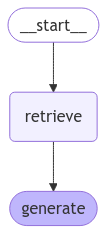

In [175]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [176]:
result = graph.invoke({'question': "What does self-reflection mean?"})
result

{'context': [Document(id='554974eb-e6f7-4fa6-afdf-e36ef5505552', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 3. Illustration of the Reflexion framework. (Image source: Shinn & Labash, 2023)\nThe heuristic function determines when the trajectory is inefficient or contains hallucination and should be stopped. Inefficient planning refers to trajectories that take too long without success. Hallucination is defined as encountering a sequence of consecutive identical actions that lead to the same observation in the environment.\nSelf-reflection is created by showing two-shot examples to LLM and each example is a pair of (failed trajectory, ideal reflection for guiding future changes in the plan). Then reflections are added into the agent’s working memory, up to three, to be used as context for querying LLM.'),
  Document(id='02db1f52-b556-4d44-8eff-a3abdae17abb', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, p

In [177]:
# Stream, make it more like chatting, avoid user waiting for full sentence.

for step in graph.stream(
    {'question': "How many components of an agent are there?"}, stream_mode='updates'
):
    print(f"{step}\n\n")

{'retrieve': {'context': [Document(id='6d1177f4-17aa-45bb-aaab-e4ae5573f8d2', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='They also discussed the risks, especially with illicit drugs and bioweapons. They developed a test set containing a list of known chemical weapon agents and asked the agent to synthesize them. 4 out of 11 requests (36%) were accepted to obtain a synthesis solution and the agent attempted to consult documentation to execute the procedure. 7 out of 11 were rejected and among these 7 rejected cases, 5 happened after a Web search while 2 were rejected based on prompt only.\nGenerative Agents Simulation#\nGenerative Agents (Park, et al. 2023) is super fun experiment where 25 virtual characters, each controlled by a LLM-powered agent, are living and interacting in a sandbox environment, inspired by The Sims. Generative agents create believable simulacra of human behavior for interactive applications.\nThe design of generative

In [183]:
for token in graph.stream(
    {'question': "What is the planning phase?"}, stream_mode = 'messages'
):
    print(f"{token[0].content}", end='$$\n')

$$
The$$
 planning$$
 phase$$
 involves$$
 breaking$$
 down$$
 complex$$
 tasks$$
 into$$
 manageable$$
 steps$$
 and$$
 form$$
ulating$$
 a$$
 strategy$$
 for$$
 action$$
.$$
 It$$
 incorporates$$
 the$$
 relationships$$
 between$$
 agents$$
 and$$
 observations$$
,$$
 along$$
 with$$
 environmental$$
 information$$
 structured$$
 in$$
 a$$
 tree$$
 format$$
.$$
 This$$
 phase$$
 is$$
 crucial$$
 for$$
 optimizing$$
 the$$
 agent$$
's$$
 responses$$
 and$$
 improving$$
 performance$$
 through$$
 techniques$$
 like$$
 task$$
 decomposition$$
 and$$
 self$$
-ref$$
lection$$
.$$
$$


In [184]:
# update metadata of documents, add 'beginining' / 'middle' / 'end' as 'section'

len_third = len(all_splits) // 3

for i, document in enumerate(all_splits):
    if i < len_third:
        document.metadata['section'] = 'beginning'
    elif i < 2*len_third:
        document.metadata['section'] = 'middle'
    else:
        document.metadata['section'] = 'ending'

all_splits[0].metadata, all_splits[-1].metadata

({'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
  'section': 'beginning'},
 {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
  'section': 'ending'})

In [185]:
from typing_extensions import TypedDict, Annotated

from typing import Literal

class SearchSection(TypedDict):
    """Search query"""
    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[Literal['beginning', 'middle', 'ending'],
                       ...,
                       "Section to query on."
                       ]

In [201]:
class State(TypedDict):
    question: str
    query: SearchSection
    context: List[Document]
    answer: str

def analyze_query(state: State):
    structured_llm = llm.with_structured_output(schema=SearchSection)
    query = structured_llm.invoke(state['question'])
    return {'query': query}

def retrieve(state: State):
    query = state['query']

    context = vector_store.similarity_search(query['query'],
                                            #  filter={'section': query['section']}) # Custom changed
                                            filter = lambda doc: doc.metadata.get('section') == query['section'])
    return {'context': context}

def generate(state: State):
    context = state['context']
    question = state['question']

    input_messages = prompt.invoke( {'context': context, 'question': question})
    response = llm.invoke(input_messages)
    return {'answer': response.content}

graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, generate])
graph_builder.add_edge(START, 'analyze_query')

graph = graph_builder.compile()

In [202]:
for step in graph.stream(
    {"question": "What does the end section says about context length?"},
    stream_mode = 'updates'
):
    print(f"{step}\n-------------------------\n")

{'analyze_query': {'query': {'query': 'context length', 'section': 'ending'}}}
-------------------------

{'retrieve': {'context': [Document(id='8c758756-f290-4df3-aff5-42e21a5b2932', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'section': 'ending'}, page_content='Finite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans wh

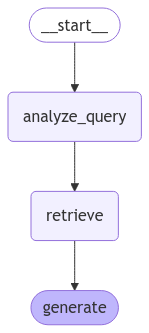

In [203]:
display(Image(graph.get_graph().draw_mermaid_png()))

Call 3 functions one after another, without a state
1. ananlyze query: extract from the query whether user want to filter which section [beginning / middle / ending]
2. extract: using the `section` and `question` to extract suitable `context` from the data
3. generate: compose a grammatically correct answer to give to user 

In [2]:
import os, api_key

os.environ['OPENAI_API_KEY'] = api_key.OPENAI_API_KEY

In [3]:
# Init llm, embeddings, vector_store
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

from langchain_core.vectorstores import InMemoryVectorStore
vector_store = InMemoryVectorStore(embeddings)

In [5]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
import bs4

loader = WebBaseLoader(
    web_paths = ("https://lilianweng.github.io/posts/2023-06-23-agent/", ),
    bs_kwargs = dict(
        parse_only=bs4.SoupStrainer(
            class_ = ("post-content", "post-title", "post-header")
        )
    )
)
docs = loader.load()


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, chunk_overlap=200
)

all_splits = text_splitter.split_documents(docs)

len(all_splits), all_splits[:10]

(66,
 [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes an

In [7]:
from typing_extensions import TypedDict, Annotated

from typing import Literal

class SearchSection(TypedDict):
    """Search query"""
    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[Literal['beginning', 'middle', 'ending'],
                       ...,
                       "Section to query on."
                       ]
    

structured_llm = llm.with_structured_output(schema = SearchSection)

In [8]:
len_third = len(all_splits) // 3

for i, document in enumerate(all_splits):
    if i < len_third:
        document.metadata['section'] = 'beginning'
    elif i < 2*len_third:
        document.metadata['section'] = 'middle'
    else:
        document.metadata['section'] = 'ending'

all_splits[0].metadata, all_splits[-1].metadata

({'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
  'section': 'beginning'},
 {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
  'section': 'ending'})

In [29]:
all_splits[0].metadata['section']

'beginning'

In [33]:
vector_store.add_documents(all_splits)

['a0eb4968-90a8-44ba-b90d-9fd17afadbdc',
 'd8d9be9a-b853-424b-9a76-0cc384cea3a0',
 '32de55e4-28b5-4de1-a3c6-42584609669f',
 'c6676fdf-f7ca-4d8b-90ae-ee4f3ac8bce6',
 'c14136f9-c36a-42a5-9af8-9bf3abfabfb6',
 '567cb20f-0296-449f-bb76-58fe6c523f9f',
 '7cb61978-d87f-43fa-90d6-ae1a1b878c6a',
 '1fbb277a-32a0-4636-ae29-9ed78efcf8e8',
 '7c878499-76f8-49de-aa35-e8d2e02e5c45',
 'd260081f-e291-4121-8fbf-f549798cef1e',
 'fcf42d82-17bb-4965-91e6-9cad4c6cf4f8',
 '85ecd6f8-d6f3-417e-8fe1-0cd55369d2a1',
 'db45a0b5-a4bf-4cc5-a49c-20f9c65af833',
 '79aadc19-1be6-4fe3-bb27-818195903ef3',
 '6e9c2ff9-59e9-448e-80ef-1a3d8dc733a8',
 '43e264cd-8835-49fe-81f1-5aec814c77d7',
 '357979ed-bb83-43b6-830e-3db76f1fae5a',
 '746b34a9-1478-4204-ab1f-c3f1e783d8a8',
 'e5c05a43-a09c-44b3-b21a-dae4317c3647',
 'a351d033-57ca-4695-9330-3e3923c91705',
 '6f6502e1-72ad-46e1-a1e2-5db5259a721d',
 '779cded0-9015-4eb0-98f2-e484d185be0a',
 'd5aa295b-6ce5-4f7b-bd6c-340c9753ecc7',
 '15a0e406-7bf0-4341-a19d-1235e23c187f',
 '86895648-d476-

In [36]:
from typing import Literal, List
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage
def analyze_query(question):
    
    desired_section = structured_llm.invoke([HumanMessage(question)])
    return desired_section

prompt = ChatPromptTemplate([
    (
        'system',
        'You are an expert in answering questions based on the provided context,'
         'if you do not know the answer to a question, you can say you dont know.'
         'Use maximum 3 sentences to answer, keep your answer concise.'
    ),
    (
        'user',
        "Question: {question} \nContext: {context}"
    )
]) 
def extract_context(desired_section) -> List[Document]:
    query = desired_section['query']
    section = desired_section['section']
    print(f"IN extract_context, query: {query}, section: {section}")
    context = vector_store.similarity_search(
        query=query,
        filter = lambda doc: doc.metadata['section'] == section
    )
    return context

def generate(question, context) -> str:

    message_retrieve_context= prompt.invoke(
        {"question": question, 'context': context})
    
    response = llm.invoke(message_retrieve_context)
    return response.content

In [37]:
question = "What does the beginning section says about challenges when building agents?"

section = analyze_query(question=question)

context = extract_context(desired_section=section)

response = generate(question=question,
                    context=context)

print(f"\n\nQuestion: {question} \nDetected section: {section} \nContext: {context} \nAnswer: {response}")

IN extract_context, query: challenges when building agents, section: beginning


Question: What does the beginning section says about challenges when building agents? 
Detected section: {'query': 'challenges when building agents', 'section': 'beginning'} 
Context: [Document(id='a0eb4968-90a8-44ba-b90d-9fd17afadbdc', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'section': 'beginning'}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s

- Test if this text_splitter can do QA on scientific documents (it was recommended only for general documents)
- Change to another more suitable for `scientific document`


Next:
- Add memory
- Convert to state? to see if it become simple

In [3]:
'''
    Lets build a RAG model to retrieve info from this paper
        paper: REALM: Retrieval-Augmented Language Model Pre-Training
        link: https://arxiv.org/pdf/2002.08909
'''
# 

'\n    Lets build a RAG model to retrieve info from this paper\n        paper: REALM: Retrieval-Augmented Language Model Pre-Training\n        link: https://arxiv.org/pdf/2002.08909\n'

In [1]:
from langchain_community.document_loaders import PyPDFLoader

file_path = 'https://arxiv.org/pdf/2002.08909'

loader = PyPDFLoader(file_path)

docs = loader.load()
len(docs)

12

In [2]:
docs

[Document(metadata={'source': 'https://arxiv.org/pdf/2002.08909', 'page': 0}, page_content='arXiv:2002.08909v1  [cs.CL]  10 Feb 2020\nREALM: Retrieval-Augmented Language Model Pre-T raining\nKelvin Guu * 1 Kenton Lee * 1 Zora T ung1 Panupong Pasupat 1 Ming-W ei Chang1\nAbstract\nLanguage model pre-training has been shown to\ncapture a surprising amount of world knowledge,\ncrucial for NLP tasks such as question answer-\ning. However, this knowledge is stored implic-\nitly in the parameters of a neural network, requir-\ning ever-larger networks to cover more facts. T o\ncapture knowledge in a more modular and inter-\npretable way, we augment language model pre-\ntraining with a latentknowledge retriever , which\nallows the model to retrieve and attend over doc-\numents from a large corpus such as Wikipedia,\nused during pre-training, ﬁne-tuning and infer-\nence. For the ﬁrst time, we show how to pre-\ntrain such a knowledge retriever in an unsuper-\nvised manner, using masked language m

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, chunk_overlap=200
)

all_splits = text_splitter.split_documents(docs)

len(all_splits), all_splits[:10]

(65,
 [Document(metadata={'source': 'https://arxiv.org/pdf/2002.08909', 'page': 0}, page_content='arXiv:2002.08909v1  [cs.CL]  10 Feb 2020\nREALM: Retrieval-Augmented Language Model Pre-T raining\nKelvin Guu * 1 Kenton Lee * 1 Zora T ung1 Panupong Pasupat 1 Ming-W ei Chang1\nAbstract\nLanguage model pre-training has been shown to\ncapture a surprising amount of world knowledge,\ncrucial for NLP tasks such as question answer-\ning. However, this knowledge is stored implic-\nitly in the parameters of a neural network, requir-\ning ever-larger networks to cover more facts. T o\ncapture knowledge in a more modular and inter-\npretable way, we augment language model pre-\ntraining with a latentknowledge retriever , which\nallows the model to retrieve and attend over doc-\numents from a large corpus such as Wikipedia,\nused during pre-training, ﬁne-tuning and infer-\nence. For the ﬁrst time, we show how to pre-\ntrain such a knowledge retriever in an unsuper-\nvised manner, using masked lang

In [4]:
import os, api_key
os.environ['OPENAI_API_KEY'] = api_key.OPENAI_API_KEY
# Init llm, embeddings, vector_store
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

from langchain_core.vectorstores import InMemoryVectorStore
vector_store = InMemoryVectorStore(embeddings)

vector_store.add_documents(all_splits)


['90a11686-d10b-4382-a8b7-d6786354e55c',
 '00ba0c9b-6b25-4840-b7e0-3a2fddb64f74',
 '7f39a146-ecca-41cb-bc5c-7322cea3e472',
 '5ebcfb0c-bcd6-4c69-b303-795fd6de02cd',
 'f8cc9cf0-eb6e-4aa4-a530-eb7357eb4243',
 'a185cfe4-6954-498d-a34b-f88ab3a2aa91',
 'd329f9cc-23fd-44de-b22f-7a0c47870dad',
 '6b0d8e26-f04d-4088-9906-9e82861a4fc4',
 '29285878-9554-4a29-9981-91ec5f8f7877',
 'a9c8bc7c-8088-4bf0-a488-41e84be1e28b',
 '7f97b4b4-2cd1-476b-8c07-b5966cab66fc',
 '059dcdf5-502c-44de-b7ee-8ffed3c84aa7',
 '837947c2-ab15-46f8-ae24-c43911ad8b64',
 '9fdd1efc-c19f-45bc-b769-be0ac797f1a3',
 '825c7401-ac9a-412a-a3c5-77b2f0323747',
 '7ba0538c-37be-477e-97a1-17925fcb796a',
 '3ceb3d68-4565-4da8-aaa7-0b909f68a71b',
 'fe473b29-9bb2-40cb-93fa-311d4f7c14c2',
 '83eb77ad-bba5-444e-8977-a926baae0f3c',
 '85fab6ac-4553-46a0-beda-2a6caedf7c9b',
 '0d58e95f-689f-4d4c-82ca-a711c812a9a2',
 '16983694-b638-4048-8f50-febd32c507cc',
 '4b44bdd5-baac-49e7-a026-b9c1e06a7375',
 'f0add0f8-f3ef-40b8-84c5-8ae119b72327',
 '8b0e04ab-c271-

In [5]:
from typing import Literal, List
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage
from langchain_core.documents import Document

prompt = ChatPromptTemplate([
    (
        'system',
        'You are an expert in answering questions based on the provided context,'
         'if you do not know the answer to a question, you can say you dont know.'
         'Use maximum 3 sentences to answer, keep your answer concise.'
    ),
    (
        'user',
        "Question: {question} \nContext: {context}"
    )
]) 
def extract_context(question) -> List[Document]:
    context = vector_store.similarity_search(
        query=question,
    )
    return context

def generate(question, context) -> str:

    message_retrieve_context= prompt.invoke(
        {"question": question, 'context': context})
    
    response = llm.invoke(message_retrieve_context)
    return response.content

In [6]:
question = "What problem in the field that this paper aiming to solve?"

context = extract_context(question=question)

response = generate(question=question, context=context)

print(f"Question: {question} \nContext: {context} \nAnswer: {response}")

Question: What problem in the field that this paper aiming to solve? 
Context: [Document(id='29285878-9554-4a29-9981-91ec5f8f7877', metadata={'source': 'https://arxiv.org/pdf/2002.08909', 'page': 1}, page_content='tic fashion (\nLee et al. , 2019; Min et al. , 2019a; Asai et al. ,\n2019). REALM achieves new state-of-the-art results on all\nthree benchmarks, signiﬁcantly outperforming all previou s\nsystems by 4-16% absolute accuracy. W e also demonstrate\nqualitative beneﬁts of REALM, including interpretability\nand modularity.\n2. Background\nLanguage model pre-trainingThe goal of language\nmodel pre-training is to learn useful representations of la n-\nguage, usually from unlabeled text corpora. The resulting\npre-trained model can then be further trained (ﬁne-tuned )\nfor a downstream task of primary interest (in our case,\nOpen-QA), often leading to better generalization than train-\ning from scratch (\nDai & Le , 2015; Radford et al. , 2019).\nW e focus on the masked language mode

This text splitter is good enough for scientific paper, since it is written English, other more complex languages include coding, markdown, HTML, .etc

In [24]:
from langchain_core.prompts import ChatPromptTemplate
from typing_extensions import TypedDict
prompt = ChatPromptTemplate([
    ('system',
     "You are an expert as answering question based on the provided context"
     "Your answer should be no more than 3 sentences, try to keep it concise"
     "If you do not know any part of the question, just say you do not know."),
     (
         'user',
         "Question: {question}\nContext: {context}\nAnswer: "
     )
])

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

def retrieve_context(state: State):
    query = state['question']

    context = vector_store.similarity_search(query=query)
    return {'context': context}

def generate(state: State):
    question = state['question']
    context =  state['context']
    context_str = '\n\n'.join([doc.page_content for doc in context])
    input_messages = prompt.invoke({
        "question": question,
        "context": context_str
    })
    response = llm.invoke(input_messages)
    return {"answer": response}

In [29]:
from langgraph.graph import START, StateGraph
from langgraph.checkpoint.memory import MemorySaver

graph_builder = StateGraph(State).add_sequence([retrieve_context, generate]).add_edge(START, 'retrieve_context')


memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

In [33]:
response = graph.invoke({
    'question': "what are score that achived SOTA in the paper?"
}, config={'configurable': {'thread_id': 'thread0123'}})

response

{'question': 'what are score that achived SOTA in the paper?',
 'context': [Document(id='3b3ca114-d63b-4d36-a596-a0d36cd01051', metadata={'source': 'https://arxiv.org/pdf/2002.08909', 'page': 6}, page_content='after ablating critical components of REALM. In addition\nto the end-to-end results, we also report how often the gold\nanswer appears in the top-5 retrievals before applying any\nﬁne-tuning. The latter metric more signiﬁcantly isolates the\ncontribution of improving the retriever during pre-traini ng.'),
  Document(id='4725ab85-7641-4330-a0ae-0f1adf3ee3e5', metadata={'source': 'https://arxiv.org/pdf/2002.08909', 'page': 6}, page_content='DrQA ( Chen et al. , 2017) Sparse Retr. +DocReader N/A - 20.7 25.7 34m\nHardEM ( Min et al. , 2019a) Sparse Retr. +Transformer BERT 28.1 - - 110m\nGraphRetriever ( Min et al. , 2019b) GraphRetriever +Transformer BERT 31.8 31.6 - 110m\nPathRetriever ( Asai et al. , 2019) PathRetriever +Transformer MLM 32.6 - - 110m\nORQA ( Lee et al. , 2019) Dens

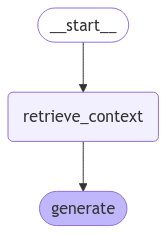

In [28]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

Next step:
- Learn RAG #2 tutorial
- Build a simple streamlit UI, to test each model / pipeline that I learn later.

RAG #2 tutorial

In [2]:
import os, api_key
os.environ['OPENAI_API_KEY'] = api_key.OPENAI_API_KEY
# Init llm, embeddings, vector_store
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

from langchain_core.vectorstores import InMemoryVectorStore
vector_store = InMemoryVectorStore(embeddings)



In [3]:
os.environ['LANGCHAIN_API_KEY'] = api_key.LANGSMITH_KEY

In [4]:
import bs4
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Load and chunk contents of the blog
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
vector_store.add_documents(all_splits)

['5dbf71fe-8b5d-4b4d-8fd9-7eed50927eed',
 '5b214bcb-0ef3-4ea6-ab4d-acb216fea43d',
 'c763dd61-c62b-4c44-a3c7-d1aa2b380bbf',
 'fcbfedb6-3ee1-432b-9fb5-abccc6df7a99',
 '37359215-7210-4bf0-abfa-b6262ab7b5f4',
 'd49d5cf3-0d6a-47b3-b2f3-b794115222ca',
 'd0fda22d-5956-4190-8f84-ecb90d696654',
 '1b5e914b-427e-4867-881f-29411efe8a8f',
 '604eb190-ec79-4521-86f8-57c5bc07ff73',
 '4d175b7c-1011-4b6b-bda1-0b7c9d9738b5',
 'ffa89a4e-93dc-4336-a2c0-1269d3f4ae7c',
 'd60fd57b-d3df-40b1-861c-b41c3f626095',
 '027579f1-7b75-4ebc-89d0-8960ea7438d3',
 '395ab9f6-1d7f-4e64-954b-bc88f5fe35c2',
 '72d3564f-3ca8-4e2c-81bd-04f5e64e4e4c',
 '3ae76397-dffd-4970-ae70-a311051c1e37',
 'ef240638-8bf5-49fb-aee6-cbad6c95d4ef',
 '26967043-5506-43a9-8612-780e9131b0b9',
 'e62f2c77-b144-47f9-ad70-067bfdb93959',
 'e6b0a042-6940-485e-a559-7368d1c56159',
 '7f075be1-6a22-4d0c-9b27-93940500c5cc',
 '894f4f44-2887-415e-bd2a-f938715f1cde',
 'ddb6eccd-753f-4626-8453-2dfce7807d04',
 'fb2cb865-df7a-4450-91b8-35bb5858f5bb',
 '78111090-2d43-

In [7]:
from langgraph.graph import StateGraph, MessagesState

graph_builder = StateGraph(MessagesState)

In [8]:
from langchain_core.tools import tool

@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to query"""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join( [f"Source: {doc.metadata}\nContent: {doc.page_content}"
                               for doc in retrieved_docs])
    return serialized, retrieved_docs


In [9]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode

def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond directly"""
    llm_with_tools = llm.bind_tools([retrieve])
    response = llm_with_tools.invoke(state['messages'])

    return {"messages": [response]}

tools = ToolNode([retrieve])

def generate(state: MessagesState):
    """Generate answer."""

    print(f"We are in `generate` step")
    recent_tool_messages = []
    for message in reversed(state['messages']): # why need reversed?
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1] # reverse the list, why?

    docs_content = "\n\n".join(doc.content for doc in tool_messages)

    system_message_content = (
            "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use three sentences maximum and keep the "
        "answer concise."
        "\n\n"
        f"{docs_content}"
    )
    conversational_messages = [
        message 
        for message in state['messages']
            if message.type in ('human', 'system')
            or (message.type == 'ai' and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversational_messages

    response = llm.invoke(prompt)
    return {'messages': [response]}



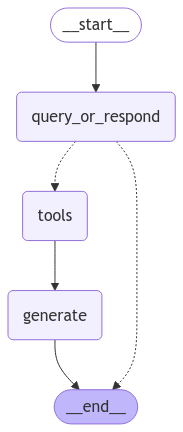

In [10]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond") # ? is this equivalent to? .add_edge(START, "query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"}
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
input_message = "Hello"
config = {"configurable": {"thread_id": "user1234"}}
output = graph.invoke({"messages": input_message}, config=config)   

output['messages'][-1].content

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='bc08522a-a56a-4363-84c7-16a29c3caf88'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 43, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-13ec030f-7515-477e-8542-dda4c6da7ec9-0', usage_metadata={'input_tokens': 43, 'output_tokens': 11, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

'Hello! How can I assist you today?'

In [12]:
input_message = "What is Task Decomposition?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_9u3eXNPGxmT77YSIDSdSJJup)
 Call ID: call_9u3eXNPGxmT77YSIDSdSJJup
  Args:
    query: Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms b

In [13]:
input_message = "Can you look up some common ways of doing it?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Can you look up some common ways of doing it?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_xIrgu9qMOqUwupWWcdGRSvb1)
 Call ID: call_xIrgu9qMOqUwupWWcdGRSvb1
  Args:
    query: common ways of task decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller an

Incorporate Agents

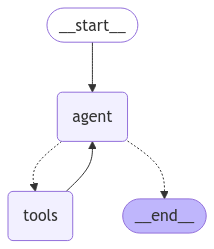

In [14]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, [retrieve], checkpointer=memory)

display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [25]:
input_message = (
    "What is the standard method for Task Decomposition?\n\n"
    "Once you get the answer, look up common extensions of that method."
)
config = {"configurable": {"thread_id": "user123"}}

for event in agent_executor.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    # event["messages"][-1].pretty_print()
    print(event['messages'][-1])



content='What is the standard method for Task Decomposition?\n\nOnce you get the answer, look up common extensions of that method.' additional_kwargs={} response_metadata={} id='9f01cc31-286b-4a74-b16d-9fc97951aeaf'
content='' additional_kwargs={'tool_calls': [{'id': 'call_GXUiHRlc2Wg8fFSdrCUdykzP', 'function': {'arguments': '{"query": "standard method for Task Decomposition"}', 'name': 'retrieve'}, 'type': 'function'}, {'id': 'call_Vuft3wxYGMfU4D1H78EsXptn', 'function': {'arguments': '{"query": "common extensions of Task Decomposition methods"}', 'name': 'retrieve'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 3756, 'total_tokens': 3810, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 3584}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3